In [1]:
import re
import glob
import os

# move .out files to correct location

In [59]:
folders = ["vzero","vpoint1","vpoint3"]
# folders = ["point125","point25","point5","point75"]
# folders = ["one"]
root_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/"
algorithm_lib = "baseline"#spinup
all_out_file = {}
for folder in folders:
    visitor_log_file = glob.glob(root_dir+folder+"/*.out", recursive=False)
    print("{}: {} files found".format(folder,len(visitor_log_file)))
    for log_file in visitor_log_file:
        print(log_file)
    all_out_file[folder] = visitor_log_file

vzero: 0 files found
vpoint1: 0 files found
vpoint3: 0 files found


In [182]:
def find_directory(file, algorithm_lib):
    
    if algorithm_lib == "spinup":
        line_starter = "Logging data to /home"
    else:
        line_starter = "Logging to /home"

    directory = None
    with open(file,"r") as file_in:
        for line in file_in:
            if line.strip():# not empty line    
                x = re.search(line_starter, line)
                if x is not None:
                    if algorithm_lib == "spinup":
                        directory = line.split("/")[-4]
                    else:
                        directory = line.split("/")[-2]
                    break
    return directory

In [183]:
# Move .out file into correct folder

for folder, files in all_out_file.items():
    print(folder)
    for f in files:
        currdir = f.split("\\")[0]
        file_name = f.split("\\")[1]
        mode = file_name.split("_")[1]
        if mode == "sara":
            mode = "SARA"
        elif mode == "pla":
            mode = "PLA"
        else:
            mode = "Random"
        
        if mode =="Random":
            datedir = find_directory(f, "baseline")
        else:
            datedir = find_directory(f, algorithm_lib)
        
        if datedir is not None:
            new_dir = os.path.join(currdir, mode, datedir, file_name)
            os.rename(f, new_dir)
            print("Move to {}".format(new_dir))
        else:
            print("Fail to move {}".format(f))
        
            
            

vzero
Move to ../SHARCNET/Results/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\PLA\2019-11-16-155736-2-10\s_pla_21907415ob.out
Move to ../SHARCNET/Results/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\PLA\2019-11-16-155734-0-10\s_pla_21907432ob.out
Move to ../SHARCNET/Results/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\PLA\2019-11-16-155733-1-10\s_pla_21907433ob.out
Move to ../SHARCNET/Results/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\SARA\2019-11-16-155740-2-11\s_sara_21907417ob.out
Move to ../SHARCNET/Results/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\SARA\2019-11-16-155740-0-10\s_sara_21907434ob.out
Move to ../SHARCNET/Results/single/ddpg/64_64_NN/old_lazy_visitor_sq_action/vzero\SARA\2019-11-16-155740-1-11\s_sara_21907435ob.out
vpoint1
vpoint3


# Convert .out to CSV

In [55]:
def out_to_csv(outfile, directory):
    f_in = open(outfile, "r")
    f_out = open(directory + "/visitor_log.csv","w")
    cnt = 0
    # skip lines in the header
    for _ in range(300):
        line = f_in.readline()
        if 'Loading' in line:
            cnt += 1
        if cnt >= 25:
            break;

    # save into CSV
    title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
            "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
            "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
            "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
            "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
    f_out.write(title)
    for line in f_in:
        if line.strip():# not empty line    

            x = re.search("^\d+(\.\d{1,2})", line)
            if x is not None:
                f_out.write(line.replace('(','').replace(')',''))

    f_in.close()
    f_out.close()
    return directory + "/visitor_log.csv"

In [60]:
all_out_file = {}
modes = ["PLA", "SARA", "Random"]
for folder in folders:
    for mode in modes:
        
        visitor_log_file = glob.glob(root_dir+folder+"/"+mode+"/**/*.out", recursive=True)
        print("{}: {} {} files found".format(folder,mode,len(visitor_log_file)))
        for out_file in visitor_log_file:
            print(out_file)
            csv_dir = os.path.join(out_file.split("\\")[0], out_file.split("\\")[1])
            csv_file_dir = out_to_csv(out_file, csv_dir)
            print("convert to: {}".format(csv_file_dir))

vzero: PLA 6 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-133932-1-0\s_pla_21879389ob.out
convert to: ../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-133932-1-0/visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-142726-1-0\s_pla_21880689ob.out
convert to: ../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-142726-1-0/visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-142728-0-0\s_pla_21880747ob.out
convert to: ../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-142728-0-0/visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-18-131018-0-90\s_pla_21969783ob.out
convert to: ../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-18-13101

# Plot visitor positions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib.patches as patches
import matplotlib as mpl

def plot_scene(ax=None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)
    
#     ir_coverages = []
    for i in range(nodes_position.shape[0]):
        ir = patches.Rectangle((-0.1,0), 0.2, 2, color="blue",  alpha=0.20)
        T = mpl.transforms.Affine2D().rotate_deg(-180+(360-nodes_position.iloc[i]['angle'])) + mpl.transforms.Affine2D().translate(nodes_position.iloc[i]['x'], nodes_position.iloc[i]['z']) + ax.transData
        ir.set_transform(T)
        ax.add_patch(ir)
    plt.scatter(nodes_position['x'], nodes_position['z'], s=10)
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    return ax

import seaborn
from matplotlib.colors import LogNorm
def heat_map(resolution, data_x, data_z, axe=None):
    bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
    bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (z_discretized[i],x_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu", ax=axe)
    ax.invert_yaxis()
    return activity_map, ax

In [107]:
from matplotlib.colors import LogNorm
import matplotlib.pylab as pylab

def plot_visitor_position(n_visitor, visitor_data, d_range=None, save_dir="./"):
    params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
    pylab.rcParams.update(params)
    if n_visitor == 1:
        dimension = [1,1]
    else:
        dimension = [2,3]

    if d_range is not None:
        start=d_range[0]
        end=d_range[1]
    else:
        start = None
        end = None

    fig = plt.figure(figsize=(30,15))
    axes = []
    for v in range(n_visitor):

    #     fig = plt.figure(figsize=(30,15))
        ax = fig.add_subplot(dimension[0],dimension[1],v+1)
        axes.append(ax)
        plt.hist2d(visitor_data['Location_x_{}'.format(v+1)][start:end], visitor_data['Location_z_{}'.format(v+1)][start:end], bins=100, normed=False, range=[[-12.5,12.5],[-7.5,7.5]], cmap='YlOrRd', norm=LogNorm())
        plt.colorbar()
        plt.grid()
        plot_scene(ax)

    fig.savefig(save_dir+"visitor_position_[{},{}].png".format(start,end), bbox_inches='tight')

def plot_visitor_position_w_area_indication(n_visitor, visitor_data, d_range=None, save_dir="./"):
    params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
    pylab.rcParams.update(params)
    if n_visitor == 1:
        dimension = [1,1]
    else:
        dimension = [2,3]

    if d_range is not None:
        start=d_range[0]
        end=d_range[1]
    else:
        start = None
        end = None

    fig = plt.figure(figsize=(30,15))
    axes = []
    for v in range(n_visitor):

    #     fig = plt.figure(figsize=(30,15))
        ax = fig.add_subplot(dimension[0],dimension[1],v+1)
        
        ir = patches.Rectangle((-4.5,-2.5), 9, 5, color="black", alpha=0.50, fill=False, linewidth=5, linestyle='--')
        ax.add_patch(ir)
        
        axes.append(ax)
        plt.hist2d(visitor_data['Location_x_{}'.format(v+1)][start:end], visitor_data['Location_z_{}'.format(v+1)][start:end], bins=100, normed=False, range=[[-12.5,12.5],[-7.5,7.5]], cmap='YlOrRd', norm=LogNorm())
        plt.colorbar()
        plt.grid()
        plot_scene(ax)

    fig.savefig(save_dir+"visitor_position_[{},{}].png".format(start,end), bbox_inches='tight')

In [111]:
visitor_data = pd.read_csv("../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA/2019-11-15-142726-1-0/visitor_log.csv", sep=',')
print(visitor_data.shape)

(612490, 36)


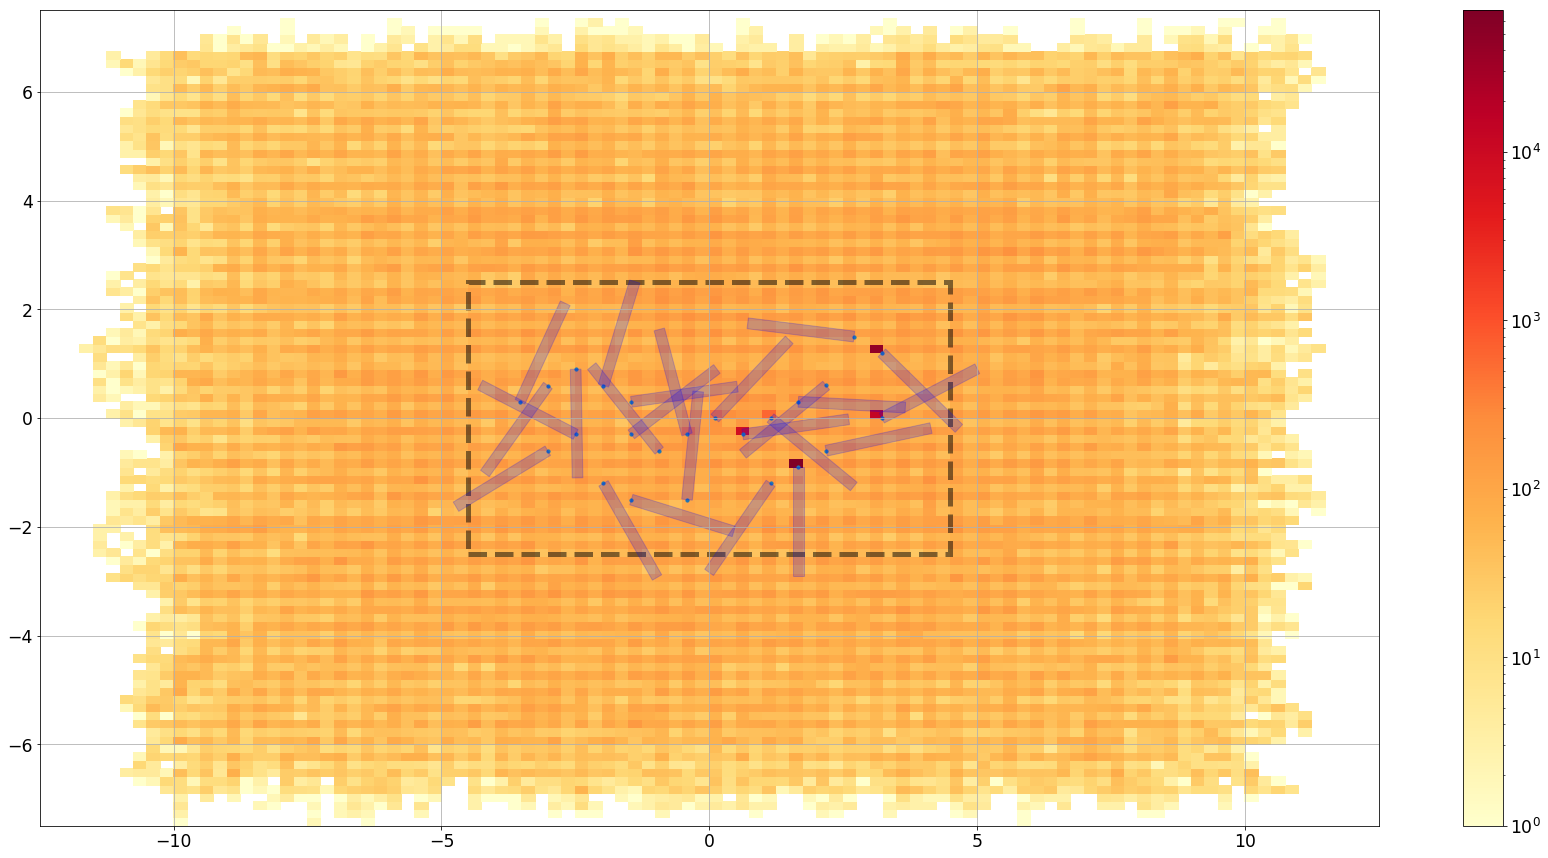

In [112]:
plot_visitor_position_w_area_indication(1, visitor_data, d_range=[None,None], save_dir = "./plots_for_thesis/visitor_position/single/new/lazy_visitor_sq_action/")

--------------------------------------

# Visitor Position Stats

In [61]:
import numpy as np
nodes_position = pd.read_csv("NodePosition.csv")
bins_x = 100
bins_y = 100
edge_x = np.linspace(-12.5, 12.5, bins_x+1)
edge_y = np.linspace(-7.5, 7.5, bins_y+1)


In [62]:
def cal_percent_time_under_nodes(visitor_data, edges, node_position_in_mesh):
    H, xedges, yedges = np.histogram2d(visitor_data['Location_x_1'], visitor_data['Location_z_1'], bins=(edges[0],edges[1]))
    total_time = 0
    for p in node_position_in_mesh:
        total_time += H[p[0],p[1]]
#     print("total_time = {}".format(total_time))
    return total_time/visitor_data.shape[0]

In [63]:
def cal_percent_time_under_LAS(visitor_data, edge_x, edge_y, area_edges):
    H, _, _ = np.histogram2d(visitor_data['Location_x_1'], visitor_data['Location_z_1'], bins=(edge_x,edge_y))
    total_time = 0
    total_time += np.sum(H[area_edges[0][0]:area_edges[0][1],area_edges[1][0]:area_edges[1][1]])
    print("total_time = {}".format(total_time))
    return total_time/visitor_data.shape[0]

In [64]:
modes = ["SARA","PLA"]
root_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/"
all_csv_files = dict()

for mode in modes:
    visitor_csv_files = glob.glob(root_dir+mode+"/**/visitor_log.csv", recursive=True)
    print("{}: {} files found".format(mode,len(visitor_csv_files)))
    for csv_file in visitor_csv_files:
        print(csv_file)
    all_csv_files[mode] = visitor_csv_files
    

SARA: 6 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-133932-0-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-142726-0-1\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-142726-1-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131018-1-90\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131018-2-90\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131019-0-90\visitor_log.csv
PLA: 6 files found
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-133932-1-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-142726-1-0\visitor_log.csv
../SHARCNET/Results/sing

### under node

In [65]:
# Count visitor positions under nodes
# get nodes position in the mesh

H1, xedges, yedges = np.histogram2d(nodes_position['x']+0.1, nodes_position['z']+0.1, bins=(edge_x,edge_y))
H2, _, _ = np.histogram2d(nodes_position['x']+0.1, nodes_position['z']-0.1, bins=(edge_x,edge_y))
H3, _, _ = np.histogram2d(nodes_position['x']-0.1, nodes_position['z']+0.1, bins=(edge_x,edge_y))
H4, _, _ = np.histogram2d(nodes_position['x']-0.1, nodes_position['z']-0.1, bins=(edge_x,edge_y))
H = H1+H2+H3+H4
nodes_position_in_mesh = []
for i in range(bins_x):
    for j in range(bins_y):
        if H[i,j] > 0:
            nodes_position_in_mesh.append([i,j])
# print(len(nodes_position_in_mesh))

In [66]:
all_percent_time_under_node = dict()
for mode in modes:
    percent_time_under_node = []
    for csv_file in all_csv_files[mode]:
        print(csv_file)
        visitor_data = pd.read_csv(csv_file, sep=',')
        percent_time_under_node.append(cal_percent_time_under_nodes(visitor_data, [edge_x, edge_y], nodes_position_in_mesh))
    all_percent_time_under_node[mode] = percent_time_under_node

../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-133932-0-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-142726-0-1\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-142726-1-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131018-1-90\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131018-2-90\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131019-0-90\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-133932-1-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/PLA\2019-11-15-142726-1-0\visitor_log.csv
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_ac

In [67]:
for mode in modes:
    print(mode)
    print("avg:{}, std:{}".format(np.average(all_percent_time_under_node[mode]), np.std(all_percent_time_under_node[mode])))

SARA
avg:0.6527452863563957, std:0.29705595775626353
PLA
avg:0.46482943039711516, std:0.2897871686316921


In [68]:
all_percent_time_under_node["PLA"]

[0.23170309332501662,
 0.992499469379092,
 0.5327646165651684,
 0.06393155694449704,
 0.5340576989012066,
 0.4340201472677105]

In [69]:
all_percent_time_under_node["SARA"]

[0.7364284384826627,
 0.6304984571176673,
 0.23286421002791882,
 0.9975003673529363,
 0.3229109183110365,
 0.9962693268461525]

### under LAS area

In [87]:
LAS_area = np.array([[-4.5,4.5],[-2.5,2.5]])
LAS_area_mesh_edge = np.array([(LAS_area[0]+12.5)*bins_x/25,(LAS_area[1]+7.5)*bins_y/15],dtype=np.int16).tolist()
print("Area mesh index:{}".format(LAS_area_mesh_edge))


all_percent_time_under_LAS = dict()
for mode in modes:
    percent_time_under_LAS = []
    for csv_file in all_csv_files[mode]:
        print(csv_file)
        visitor_data = pd.read_csv(csv_file, sep=',')
        print(visitor_data.shape)
        percent_time_under_LAS.append(cal_percent_time_under_LAS(visitor_data, edge_x, edge_y, LAS_area_mesh_edge))
    all_percent_time_under_LAS[mode] = percent_time_under_LAS

Area mesh index:[[32, 68], [33, 66]]
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-133932-0-0\visitor_log.csv
(612494, 36)
total_time = 604679.0
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-142726-0-1\visitor_log.csv
(612490, 36)
total_time = 442592.0
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-15-142726-1-0\visitor_log.csv
(612490, 36)
total_time = 253518.0
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131018-1-90\visitor_log.csv
(612490, 36)
total_time = 612404.0
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131018-2-90\visitor_log.csv
(612494, 36)
total_time = 535678.0
../SHARCNET/Results/single/ddpg/64_64_NN/new_lazy_visitor_sq_action/vzero/SARA\2019-11-18-131019-0-90\visitor_log.csv
(612490, 36)
total_time = 611682.0
../SHARCNET/Results/single/ddpg/64_64_NN/new_laz

In [88]:
for mode in modes:
    print(mode)
    print("avg:{}, std:{}".format(np.average(all_percent_time_under_LAS[mode]), np.std(all_percent_time_under_LAS[mode])))

SARA
avg:0.8328151079194922, std:0.21159340045803499
PLA
avg:0.7244462463759476, std:0.28960492926418574


In [89]:
all_percent_time_under_LAS["PLA"]

[0.40906740641645395,
 0.9979656810723441,
 0.9849434276477983,
 0.28251366210193024,
 0.9790200656337247,
 0.6931672353834348]

In [90]:
all_percent_time_under_LAS["SARA"]

[0.9872406913373846,
 0.722610981403778,
 0.41391369655014776,
 0.9998595895443191,
 0.8745848938928381,
 0.9986807947884864]